# Hypothesis Testing 
- Victoria White
- 27 October 2022

In [1]:
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import scipy

## Data

In [2]:
insurance_df = pd.read_csv('Data/insurance.csv')
df = insurance_df.copy()

In [3]:
#displaying head and info
df.info()
df.head()
#there are no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#checking for duplicates
df.duplicated().sum()

1

In [5]:
#dropping duplicates
df = df.drop_duplicates()
df.duplicated().sum()

0

## Q1: Do smokers have higher insurance charges than non-smokers?

### 1. State your Null Hypothesis and Alternative Hypothesis
- Null Hypothesis: There is no difference in insurance charges between smokers and non-smokers.
- Alternate Hypothesis: There is a difference in insurance charges between smokers and non-smokers.

### 2. Select the correct test according to the data type and number of samples. 
- Type of Data
    - numeric
- Number of Samples/Groups
    - 2 samples
- Appropriate Test
    - 2 sample T-test

In [6]:
df['smoker'].value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

In [7]:
#columns to look at
needed_cols = ['smoker', 'charges']

In [8]:
#separating smokers and non-smokers
smoker_df = df.loc[df['smoker']=='yes', needed_cols]
smoker_df

,smoker,charges
0,yes,16884.92400
11,yes,27808.72510
14,yes,39611.75770
19,yes,36837.46700
23,yes,37701.87680
...,...,...
1313,yes,36397.57600
1314,yes,18765.87545
1321,yes,28101.33305
1323,yes,43896.37630


In [9]:
non_smoker_df = df.loc[df['smoker'] == 'no', needed_cols]
non_smoker_df

,smoker,charges
1,no,1725.55230
2,no,4449.46200
3,no,21984.47061
4,no,3866.85520
5,no,3756.62160
...,...,...
1332,no,11411.68500
1333,no,10600.54830
1334,no,2205.98080
1335,no,1629.83350


In [10]:
# combining dataframes
plot_df = pd.concat([smoker_df, non_smoker_df])
plot_df

,smoker,charges
0,yes,16884.9240
11,yes,27808.7251
14,yes,39611.7577
19,yes,36837.4670
23,yes,37701.8768
...,...,...
1332,no,11411.6850
1333,no,10600.5483
1334,no,2205.9808
1335,no,1629.8335


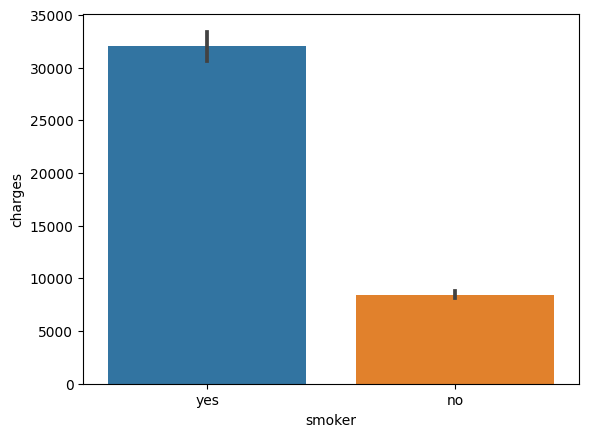

In [11]:
#visualizing group means
sns.barplot(data = plot_df, x ='smoker', y='charges');

### Testing Assumptions
- No significant outliers
- Normality
- Equal Variance

In [12]:
#saving numeric col as final group variables
smokers = smoker_df['charges']
non_smokers = non_smoker_df['charges']
smokers

0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64

In [13]:
#checking for outliers in smoker
smoker_outliers = np.abs(stats.zscore(smokers)) > 3
smoker_outliers.sum()

0

In [14]:
#making copy for clean smoker group since there were no outliers to drop
smoker_cln = smokers.copy()
smoker_cln

0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64

In [15]:
#checking for outliers in non_smoker
non_smoker_outliers = np.abs(stats.zscore(non_smokers)) > 3
non_smoker_outliers.sum()

24

In [16]:
#dropping outliers
non_smoker_cln = non_smokers[non_smoker_outliers==False]
non_smoker_cln

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1039, dtype: float64

#### Test for Normality

In [17]:
#check smoker group for normality
stats.normaltest(smoker_cln)

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [18]:
#check non_smoker group for normality
stats.normaltest(non_smoker_cln)

NormaltestResult(statistic=163.70821423990097, pvalue=2.8262654970074626e-36)

#### - Both p values are smaller than the alpha value (0.05), but there are enough samples to proceed.

#### Test for Equal Variance

In [19]:
result = stats.levene(smoker_cln, non_smoker_cln)
result

LeveneResult(statistic=520.7178262969225, pvalue=2.512613039096279e-97)

#### - These two groups don't have equal variance, so we will need to include "equal_var=False" when we perform the t-test.

### Q1 Final Hypothesis Test

In [26]:
final_result = stats.ttest_ind(smoker_cln, non_smoker_cln, equal_var=False)
final_result

Ttest_indResult(statistic=33.723466247187815, pvalue=2.7282718648018296e-104)

#### - The pvalue is way smaller than our alpha value, so we reject the null hypothesis.

In [25]:
print('Smoker AVG Charge')
print(smoker_cln.mean())
print('Non-Smoker AVG Charge')
print(non_smoker_cln.mean())

Smoker AVG Charge
32050.23183153284
Non-Smoker AVG Charge
7945.9246538585185


#### Final Conclusion
- Smokers have higher insurance charges than non-smokers.

## Q2: Are men more likely to smoke than women?

### 1. State the Null Hypothesis and Alternate Hypothesis
- Null Hypothesis: There is no relationship between a person's sex and whether or not that person smokes.
- Alternate Hypothesis: A person's sex influences if that person smokes or not.

### 2. Select the correct test according to the data type and number of samples. 
- Type of Data
    - categorical
- Number of Samples/Groups
    - 2 samples
- Appropriate Test
    - Chi-Square

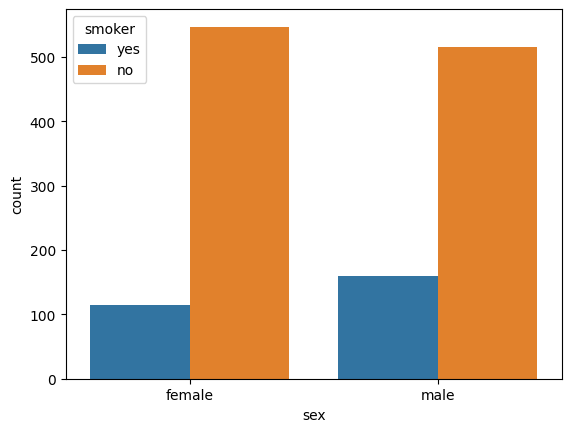

In [30]:
sns.countplot(data=df, x='sex', hue='smoker');

### Testing Assumptions
#### Assumptions  
- There are two categorical variables.
- The outcomes are independent.

In [31]:
q2_table = pd.crosstab(df['sex'], df['smoker'])
q2_table

smoker,no,yes
sex,,
female,547,115
male,516,159


### Q2 Final Hypothesis Testing

In [32]:
#running test and saving output
q2_result = stats.chi2_contingency(q2_table)
chi2, p, def_free, expected_vals = q2_result

In [36]:
print(p)
p < 0.5

0.0062765550120107375


True

#### Final Conclusion
#### - The p-value is less than 0.05 so we reject the null hypothesis. A person's sex does influence whether or not they smoke.
#### - From our table, we see that there are more female non-smokers and more male smokers. Therefore, men are more likely to smoke.

## Q3: Do different regions have different charges, on average?

### 1. State your Null Hypothesis and Alternative Hypothesis
- Null Hypothesis: There is no difference in average charges of different regions.
- Alternate Hypothesis: There is a difference in average charges of different regions.

### 2. Select the correct test according to the data type and number of samples. 
- Type of Data
    - numeric
- Number of Samples/Groups
    - 4 samples
- Appropriate Test
    - ANOVA and Kruskal-Wallis

In [76]:
regions = df['region'].unique()
regions

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

<AxesSubplot:xlabel='region', ylabel='charges'>

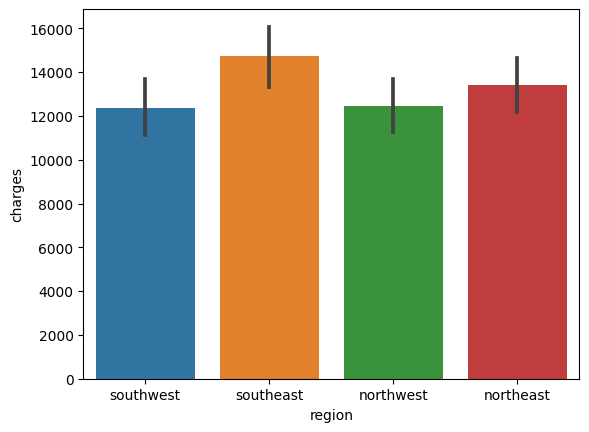

In [77]:
sns.barplot(data=df, x= 'region', y='charges')

### Testing Assumptions

In [61]:
#creating dict with each region as key and charges as values
groups = {}

for region in regions:
    temp = df.loc[df['region']==region, 'charges']
    groups[region] = temp

In [62]:
#checking region in dict
groups['southeast']

1        1725.5523
2        4449.4620
5        3756.6216
6        8240.5896
11      27808.7251
           ...    
1322    12981.3457
1323    43896.3763
1327     9377.9047
1330    12629.1656
1335     1629.8335
Name: charges, Length: 364, dtype: float64

#### Checking Assumption for Significant Outliers

In [65]:
groups_cln = {}

for region_name, group_data in groups.items():
    idx_outliers = np.abs(stats.zscore(group_data)) > 3
    print(f"There were {idx_outliers.sum()} outliers in {region_name}")
    group_data_cln = group_data[idx_outliers==False]
    groups_cln[region_name] = group_data_cln
    

There were 8 outliers in southwest
There were 2 outliers in southeast
There were 7 outliers in northwest
There were 4 outliers in northeast


### Test for Normality

In [69]:
norm_results = [['group', 'n', 'pval', 'sig?']]

for region_name, region_data in groups_cln.items():
    result = stats.normaltest(region_data)
    norm_results.append([region_name, len(region_data), result.pvalue,
                         result.pvalue < 0.05])
    
norm_results

[['group', 'n', 'pval', 'sig?'],
 ['southwest', 317, 7.728611243124505e-22, True],
 ['southeast', 362, 1.9369900501741734e-13, True],
 ['northwest', 317, 3.547435352928033e-19, True],
 ['northeast', 320, 3.5578767155624347e-17, True]]

#### All pvalues are significant, but we have enough samples to proceed.

### Test for Equal Variance

In [71]:
stats.levene(*groups_cln.values())

LeveneResult(statistic=9.515214992781331, pvalue=3.218183807441283e-06)

#### Pvalue < 0.05 so we reject the null hypothesis, meaning we do not have equal variance. We will need to use Kruskal-Wallis for our final hypothesis testing.

### Q3 Final Hypothesis Testing

In [75]:
stats.kruskal(*groups_cln.values())

KruskalResult(statistic=6.770873301853044, pvalue=0.07957070570915381)

#### Pvalue > 0.05 so we fail to reject our null hypothesis. There is no significant difference in average charges in different regions. 

In [80]:
df.groupby('region', as_index=False)['charges'].mean()

,region,charges
0,northeast,13406.384516
1,northwest,12450.840844
2,southeast,14735.411438
3,southwest,12346.937377
